In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
DATA_PATH = '../input/shopee-product-detection-open/'

In [3]:
!ls ../input/shopee-product-detection-open/train/train/train

00  03	06  09	12  15	18  21	24  27	30  33	36  39
01  04	07  10	13  16	19  22	25  28	31  34	37  40
02  05	08  11	14  17	20  23	26  29	32  35	38  41


In [4]:
# labels of images
train_df = pd.read_csv(DATA_PATH + 'train.csv')
test_df = pd.read_csv(DATA_PATH + 'test.csv')

print(f"There are {train_df.shape[0]} images in train set")
print(f"There are {test_df.shape[0]} images in test set")

There are 105390 images in train set
There are 12186 images in test set


In [5]:
train_df.head()  # filenames with true labels

filename  category
0  45e2d0c97f7bdf8cbf3594beb6fdcda0.jpg         3
1  f74d1a5fc2498bbbfa045c74e3cc333e.jpg         3
2  f6c172096818c5fab10ecae722840798.jpg         3
3  251ffd610399ac00fea7709c642676ee.jpg         3
4  73c7328b8eda399199fdedec6e4badaf.jpg         3

In [6]:
test_df.head()  # filenames with true labels

filename  category
0  fd663cf2b6e1d7b02938c6aaae0a32d2.jpg        43
1  c7fd77508a8c355eaab0d4e10efd6b15.jpg        43
2  127f3e6d6e3491b2459812353f33a913.jpg        43
3  5ca4f2da11eda083064e6c36f37eeb81.jpg        43
4  46d681a542f2c71be017eef6aae23313.jpg        43

In [7]:
train_df.category.nunique(), test_df.category.nunique()

(42, 1)

In [8]:
train_df.category.max(), train_df.category.min()

(41, 0)

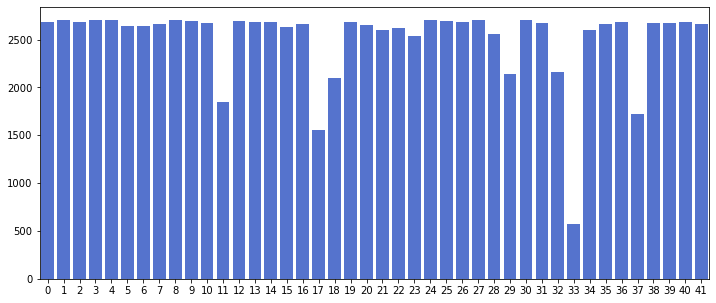

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,5))
nb_each_class = dict(train_df.category.value_counts())
sns.barplot(x=pd.Series(nb_each_class).index, y=pd.Series(nb_each_class).values, color='royalblue');

In [10]:
!pip install -q plotly_express
import plotly_express as px

nb_each_class = train_df.groupby('category').count().reset_index()
nb_each_class.columns = ['category', 'counts']
fig = px.bar(nb_each_class, x='category', y='counts', width=600, height=450)
fig.show()

In [11]:
im_files = os.listdir(DATA_PATH + 'train/train/train/00')
im_files[:5]

['dd10ac6894fbd13b026da5475e2ddcc7.jpg',
 'bfc6522c1a502e7d32bfe178faace822.jpg',
 '5cfce54151966b8b61477447af34c824.jpg',
 'bae5c8fa8ef983a1817acea226c8db92.jpg',
 'ecd9e760a0b8a7fd7a844f0468b40a1d.jpg']

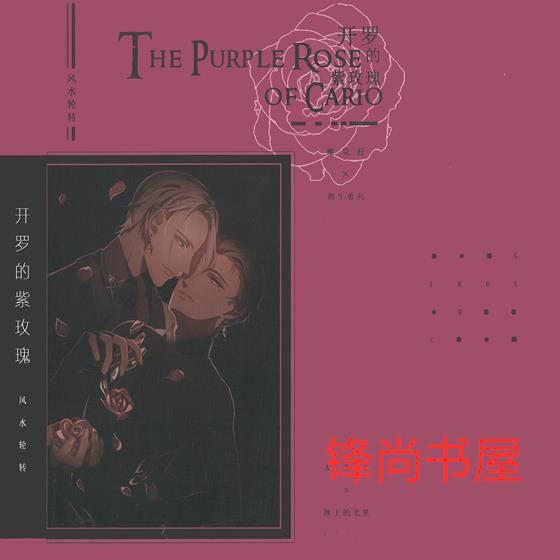

In [12]:
# read images
from PIL import Image 

im_files = os.listdir(DATA_PATH + 'train/train/train/00')
im = Image.open(DATA_PATH + 'train/train/train/00/' + im_files[0])
im

In [13]:
# in Pillow, im.size output (width, height)
# in nd array, im.size output (height, width, channels) or (H, W, C)

print(type(im), type(np.array(im)))
print(im.size, np.array(im).shape)

<class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'numpy.ndarray'>
(560, 560) (560, 560, 3)


In [14]:
def show_cat_images(cat, row=3, col=3):
    # see random images in one category
    HEIGHT, WIDTH = 224, 224
    fig, axes = plt.subplots(row, col, figsize=(row*3,col*3))
    axes = axes.ravel()

    ims = [np.array(Image.open(DATA_PATH + f'train/train/train/{cat}/' + f).resize((HEIGHT, WIDTH))) \
           for f in np.random.choice(os.listdir(DATA_PATH + f'train/train/train/{cat}'), row*col, replace=False)]

    for i in range(row*col):
        im = ims[i]
        axes[i].axis('off')
        axes[i].imshow(im)

def show_test_images(row=3, col=3):
    # see random images in one category
    HEIGHT, WIDTH = 224, 224
    fig, axes = plt.subplots(row, col, figsize=(row*3,col*3))
    axes = axes.ravel()

    ims = [np.array(Image.open(DATA_PATH + f'test/test/test/' + f).resize((HEIGHT, WIDTH))) \
           for f in np.random.choice(os.listdir(DATA_PATH + f'test/test/test/'), row*col, replace=False)]

    for i in range(row*col):
        im = ims[i]
        axes[i].axis('off')
        axes[i].imshow(im)

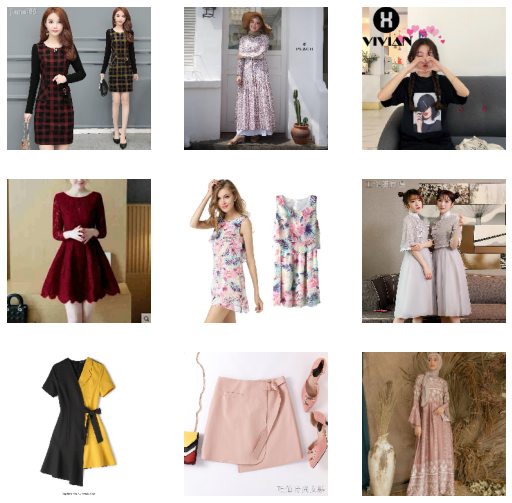

In [15]:
show_cat_images("00")

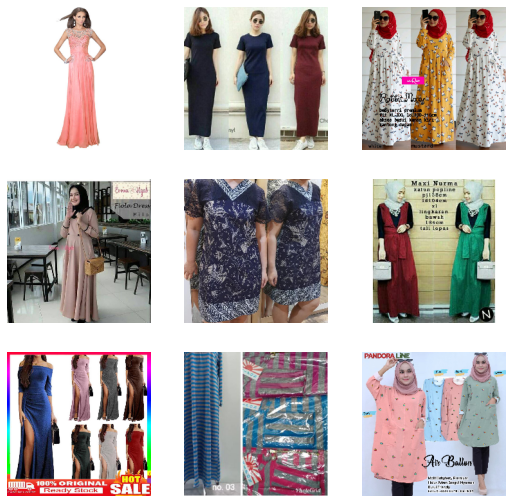

In [16]:
show_cat_images("01")

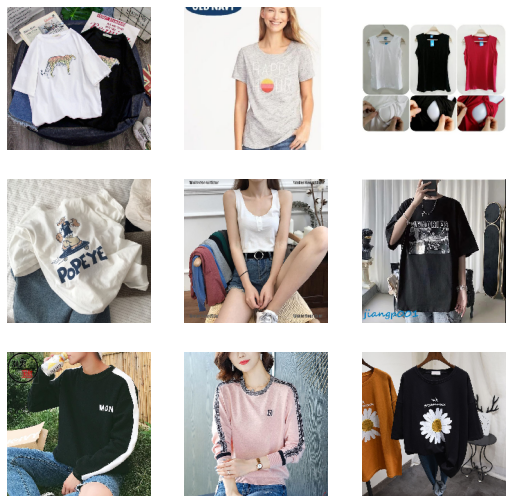

In [17]:
show_cat_images("02")

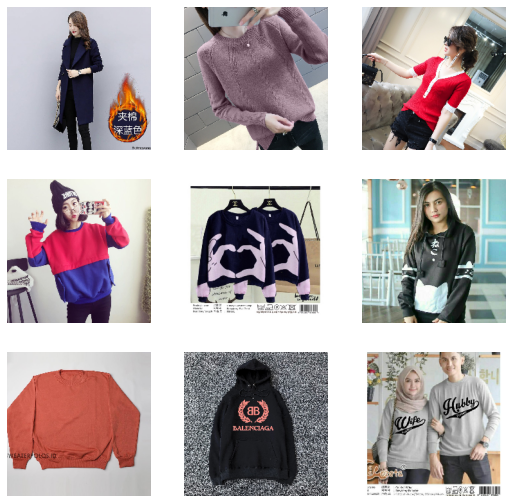

In [18]:
show_cat_images("03")  # model confused with categories 00-03

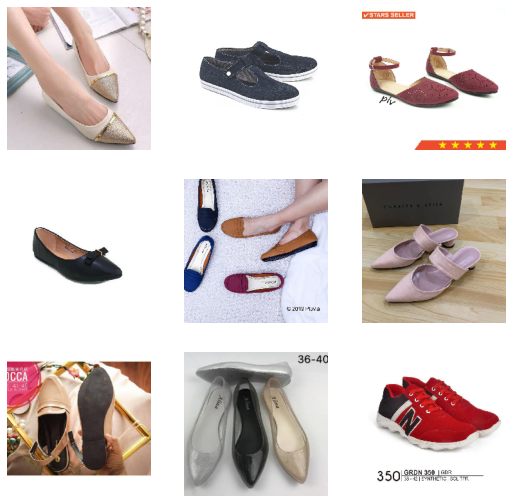

In [19]:
show_cat_images("16")

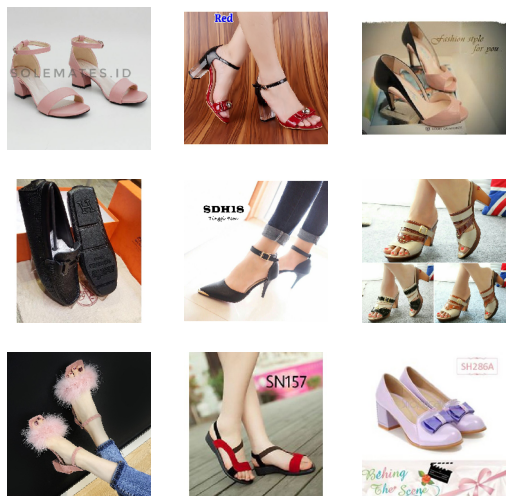

In [20]:
show_cat_images("17")  # model confused between categories 16, 17, also 17 with less examples

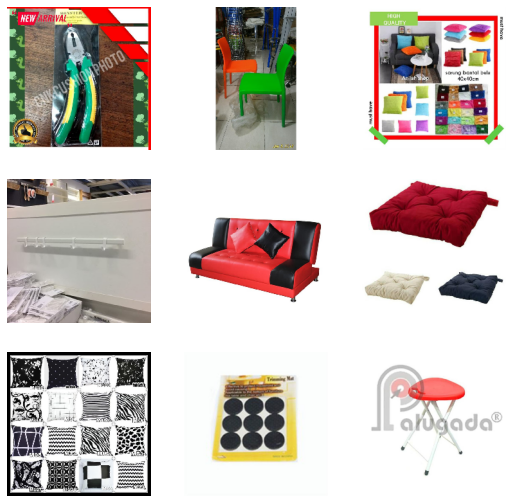

In [21]:
show_cat_images("20")

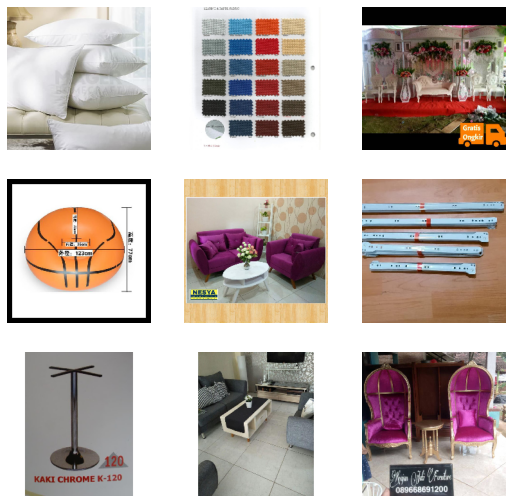

In [22]:
show_cat_images("41")  # model confused between categories 20, 41

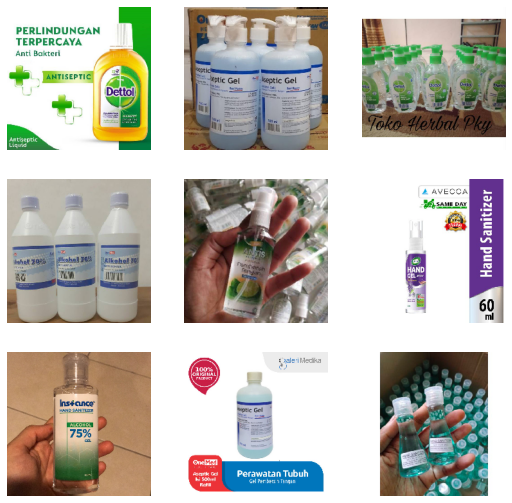

In [23]:
show_cat_images("33")  # fewest examples

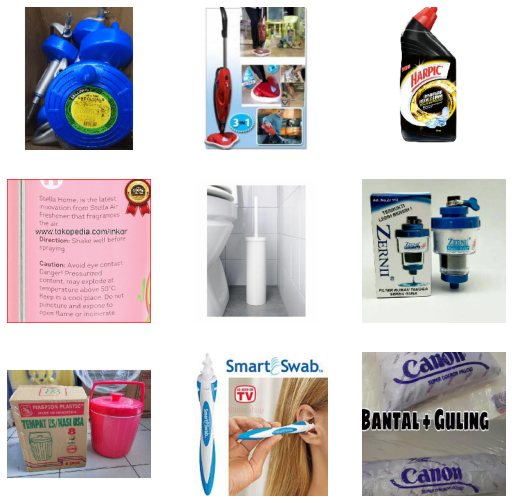

In [24]:
show_cat_images("36")  # low accuracy

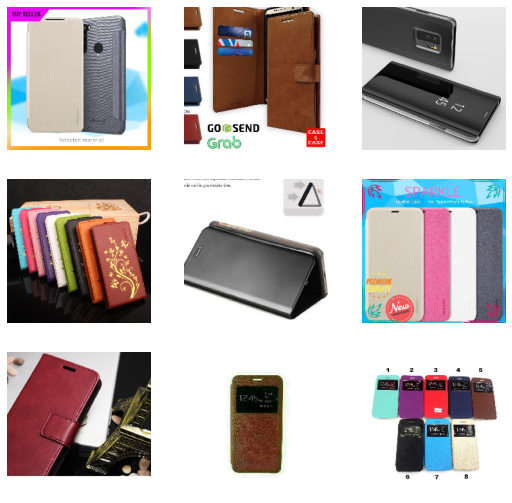

In [25]:
show_cat_images("10")

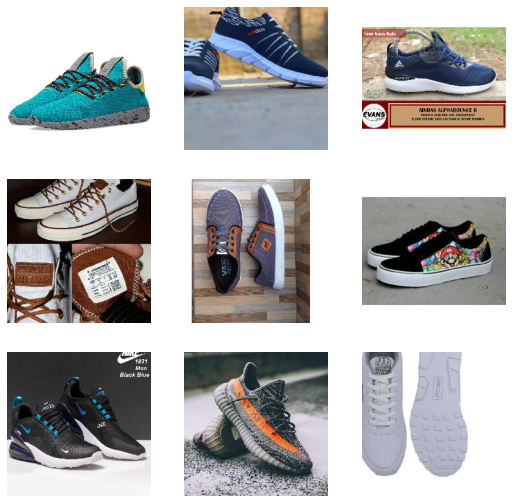

In [26]:
show_cat_images("30")

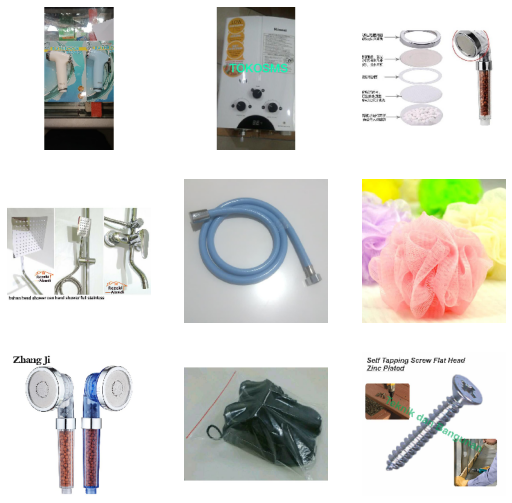

In [27]:
show_cat_images("40")

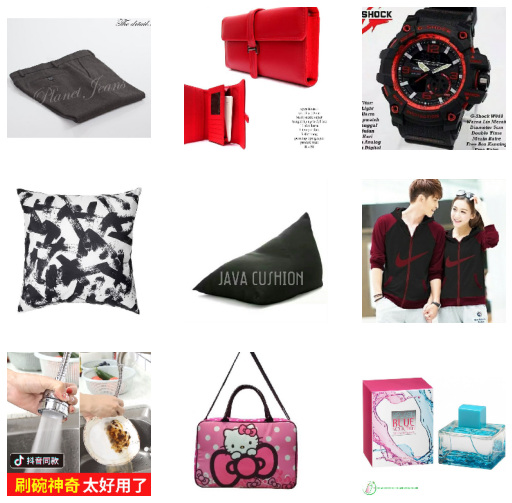

In [28]:
show_test_images()